<a href="https://colab.research.google.com/github/Riky2014/Tesi/blob/main/Software%20verification/Convergence_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/A1_ex.pkl', 'rb') as f:
  A1_ex = pickle.load(f)

file_names = [
    'A1_16.pkl',
    'A1_32.pkl',
    'A1_64.pkl',
    'A1_128.pkl'
]

A1 = []

for file_name in file_names:
    with open(f'/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/{file_name}', 'rb') as f:
        A1.append(pickle.load(f))

with open('/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/q1_ex.pkl', 'rb') as f:
  q1_ex = pickle.load(f)

file_names = [
    'q1_16.pkl',
    'q1_32.pkl',
    'q1_64.pkl',
    'q1_128.pkl'
]

q1 = []

for file_name in file_names:
    with open(f'/content/drive/MyDrive/ColabNotebooks/Tesi/Convergence rate/{file_name}', 'rb') as f:
        q1.append(pickle.load(f))

In [6]:
h_ex = 1 / 256
dt_ex = 2e-6

time_step_ex = int(1 / dt_ex)
N_ex = int(1 / h_ex)

h_vec = [1 / 16, 1 / 32, 1 / 64, 1 / 128]
dt_vec = [32e-6, 16e-6, 8e-6, 4e-6]

N_vec = [int(1 / h) for h in h_vec]
time_step_vec = [int(1 / dt) for dt in dt_vec]

In [10]:
err_L2 = []

for k in range(len(h_vec)):
  h = h_vec[k]
  dt = dt_vec[k]
  time_step = time_step_vec[k]
  N = N_vec[k]

  sum = 0

  for i in range(time_step):
    for j in range(N+1):
      sum += (q1_ex[i * int(time_step_ex / time_step)][j * int(N_ex / N)] - q1[k][i][j])**2 #((A1_ex[i * int(time_step_ex / time_step)][j * int(N_ex / N)] - A1[k][i][j])**2) #+

  err = np.sqrt(sum * h * dt)
  err_L2.append(err)

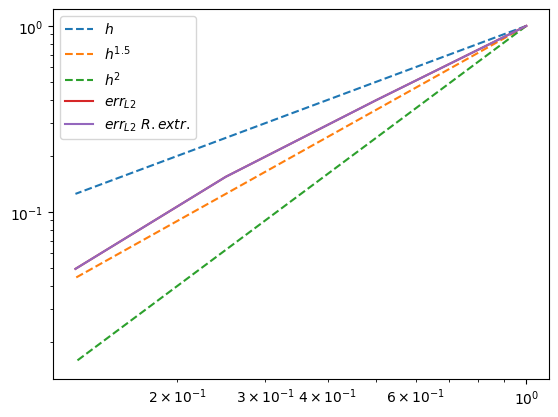

In [11]:
plt.figure()

# Normalize x-axis values
x_values = [h / h_vec[0] for h in h_vec]

# Normalize y-axis values for each line
y1_values = [h / h_vec[0] for h in h_vec]
y2_values = [h2 / (h_vec[0]**1.5) for h2 in [h**1.5 for h in h_vec]]
y3_values = [h3 / (h_vec[0]**2) for h3 in [h**2 for h in h_vec]]

y4_values = [err / err_L2[0] for err in err_L2]

#Richardson extrapolation
y5_values = [(2*err_L2[ii]-err_L2[ii-1]) / err_L2[0] for ii in range(1,len(err_L2))]

plt.loglog(x_values, y1_values, linestyle = '--', label='$h$')
plt.loglog(x_values, y2_values, linestyle = '--', label='$h^{1.5}$')
plt.loglog(x_values, y3_values, linestyle = '--', label='$h^2$')

plt.loglog(x_values, y4_values, label='$err_{L2}$')
plt.loglog(x_values, y4_values, label='$err_{L2} \ R. extr.$')

plt.legend()
plt.show()